In [28]:
using JLD, PyPlot

In [86]:
archivo="/home/karel/RGutWork/JLDFiles/evento_desinhibido_2.jld"

"/home/karel/RGutWork/JLDFiles/evento_desinhibido_2.jld"

In [87]:
Arxivo=load(archivo)

Dict{ByteString,Any} with 7 entries:
  "Canalesrespuesta" => Set([[27,62],[36,44],[37,62],[48,50],[51,31],[34,34],[5…
  "KTT_KInv"         => 4091x4091 Array{Float64,2}:…
  "kCSDCorrecta"     => 64x64x2000 Array{Float64,3}:…
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "LFPSaturados"     => 64x64x2000 Array{Float64,3}:…
  "freq"             => 7.022058198545425
  "CanalesSaturados" => Set([[31,6],[59,51],[21,59],[50,62],[1,1]])

In [88]:
nota=Arxivo["Nota"]

"Usamos las siguientes B y BT para obtener las Ks: BceroDura-r-0.25.dat y BtildeceroDura-r-0.25.dat"

In [91]:
CSD=Arxivo["kCSDCorrecta"];
LFP=Arxivo["LFPSaturados"];
KOp=Arxivo["KTT_KInv"];

In [35]:
(alto,ancho,tmax)=size(CSD)

(64,64,2000)

In [36]:
satu=length(Arxivo["CanalesSaturados"])

5

In [37]:
listonga=(135,139,149)   

(135,139,149)

In [38]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

7.022058198545425

In [39]:
retrazo=0

0

In [40]:
Arxivo["Nota"]

"Usamos las siguientes B y BT para obtener las Ks: BceroDura-r-0.0675.dat y BtildeceroDura-r-0.0675.dat"

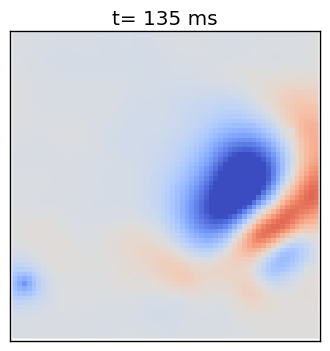

PyObject <matplotlib.image.AxesImage object at 0x7f987c287e48>

In [84]:
t=950
ion()
limites=250
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
    left="off",
# ticks along the top edge are off
    labelbottom="off",
    labelleft="off")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="nearest",
                      cmap="coolwarm", 
                      vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

#cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
#cbx[:set_label]("<-Sink | Source->")

In [85]:
ioff()
limites=250
for t=800:7:1350
#t=954
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="nearest",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx[:set_label]("<-Sink | Source->")
    savefig("CSD_eventodeshinibido_02_$t.pdf",dpi=90)
    close(figura)
end
PyPlot.close_figs()

In [52]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

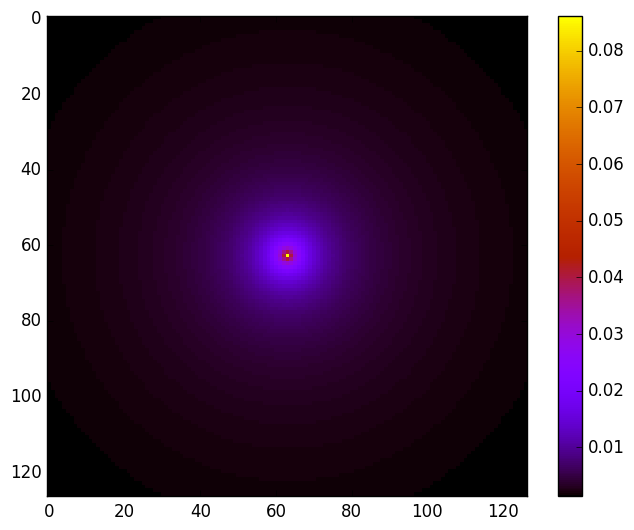

PyObject <matplotlib.colorbar.Colorbar object at 0x7f9877dc50b8>

In [53]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [54]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

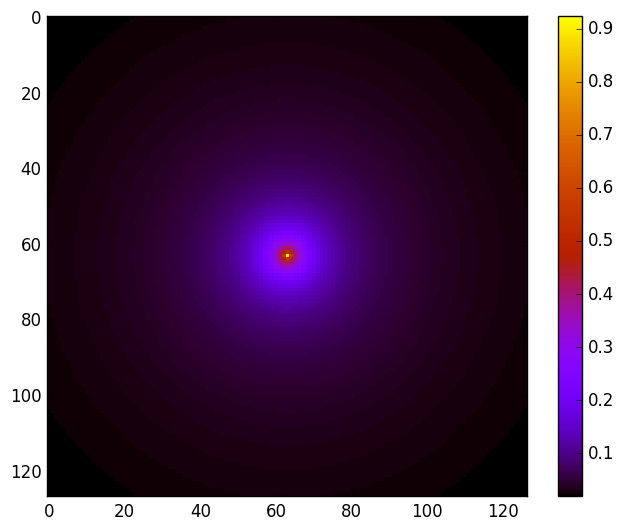

PyObject <matplotlib.colorbar.Colorbar object at 0x7f98785338d0>

In [50]:
aver=imshow(b,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [70]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

127-element Array{Float64,1}:
 0.00188806
 0.00191834
 0.00194959
 0.00198188
 0.00201526
 0.00204977
 0.00208548
 0.00212245
 0.00216075
 0.00220046
 0.00224164
 0.00228439
 0.0023288 
 ⋮         
 0.00228439
 0.00224164
 0.00220046
 0.00216075
 0.00212245
 0.00208548
 0.00204977
 0.00201526
 0.00198188
 0.00194959
 0.00191834
 0.00188806

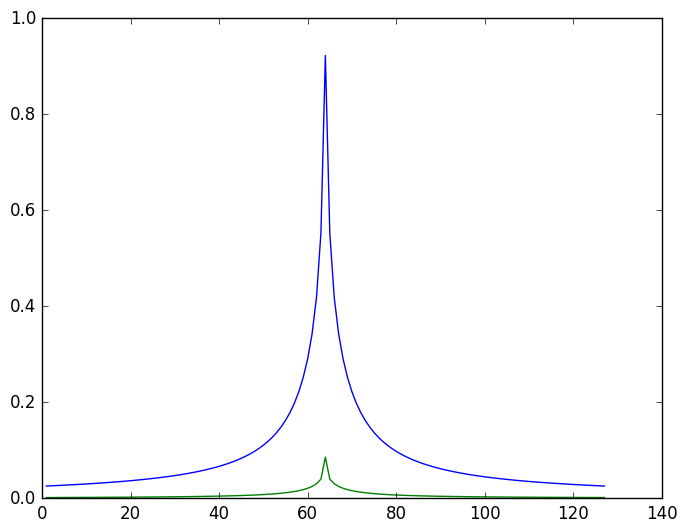

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f987709fa58>

In [72]:
plot(1:127,tu)
plot(1:127,te)

In [57]:
bgmin=bgrande/minimum(bgrande)

127x127 Array{Float64,2}:
 1.0      1.00794  1.01595  1.02401  …  1.02401  1.01595  1.00794  1.0    
 1.00794  1.01608  1.02428  1.03255     1.03255  1.02428  1.01608  1.00794
 1.01595  1.02428  1.03269  1.04116     1.04116  1.03269  1.02428  1.01595
 1.02401  1.03255  1.04116  1.04984     1.04984  1.04116  1.03255  1.02401
 1.03213  1.04088  1.0497   1.0586      1.0586   1.0497   1.04088  1.03213
 1.04031  1.04926  1.0583   1.06743  …  1.06743  1.0583   1.04926  1.04031
 1.04854  1.05771  1.06697  1.07632     1.07632  1.06697  1.05771  1.04854
 1.05682  1.06621  1.0757   1.08528     1.08528  1.0757   1.06621  1.05682
 1.06514  1.07476  1.08448  1.0943      1.0943   1.08448  1.07476  1.06514
 1.07351  1.08336  1.09332  1.10339     1.10339  1.09332  1.08336  1.07351
 1.08193  1.09201  1.10221  1.11253  …  1.11253  1.10221  1.09201  1.08193
 1.09037  1.1007   1.11115  1.12172     1.12172  1.11115  1.1007   1.09037
 1.09886  1.10943  1.12013  1.13096     1.13096  1.12013  1.10943  1.09886

In [59]:
cloack=bgmin-brmin

127x127 Array{Float64,2}:
  0.0         -4.93049e-7  -9.26669e-7   …  -4.93049e-7   0.0       
 -4.93049e-7   1.87244e-7   9.91145e-7       1.87244e-7  -4.93049e-7
 -9.26669e-7   9.91145e-7   9.43439e-7       9.91145e-7  -9.26669e-7
 -1.18418e-6   5.72591e-7  -4.27397e-7       5.72591e-7  -1.18418e-6
  2.0205e-8    6.06193e-8   1.95507e-7       6.06193e-8   2.0205e-8 
 -1.68787e-7  -3.80773e-7   4.0806e-7    …  -3.80773e-7  -1.68787e-7
 -3.64237e-7  -2.97511e-8   6.17864e-8      -2.97511e-8  -3.64237e-7
  1.70065e-7   1.59241e-9   3.62877e-7       1.59241e-9   1.70065e-7
 -4.06925e-7   8.07708e-8  -4.79393e-7       8.07708e-8  -4.06925e-7
  2.08605e-7  -5.05447e-8   5.62564e-7      -5.05447e-8   2.08605e-7
  7.70359e-7  -4.1385e-7    4.14957e-7   …  -4.1385e-7    7.70359e-7
  6.16851e-7   5.80022e-7  -6.68504e-8       5.80022e-7   6.16851e-7
  2.96029e-7   8.87429e-7   1.23119e-10      8.87429e-7   2.96029e-7
  ⋮                                      ⋱   ⋮                      
  6.1685

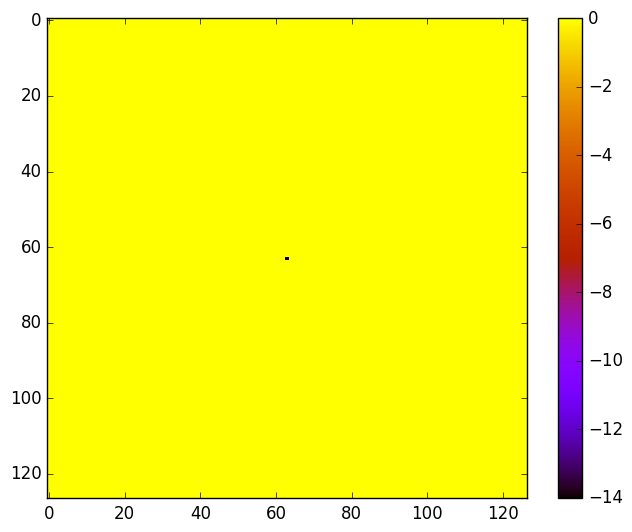

PyObject <matplotlib.colorbar.Colorbar object at 0x7f98776cf6a0>

In [63]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

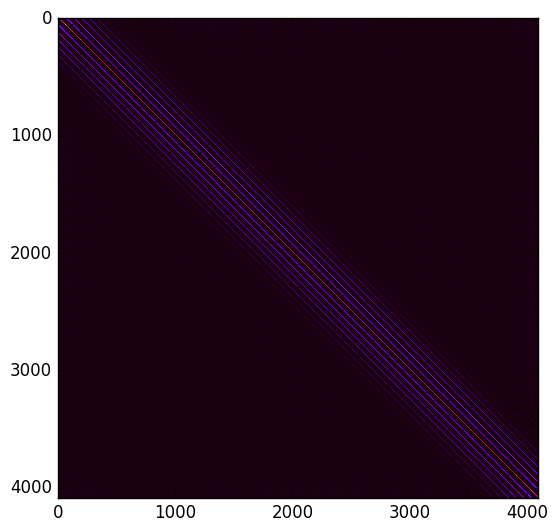

PyObject <matplotlib.image.AxesImage object at 0x7f98777abc88>

In [93]:
imshow(KOp,cmap="gnuplot")